# My Project Notebook

**Rachel King**

***

## **Introduction** ##

The Iris dataset is one of the most well-known data sets in relation to pattern recognition.

The dataset was created in 1936 by R.A Fisher. It contains 3 classes, with each class referencing a type of iris plant. There are 50 instances of each class, with 150 instances in total.

Each class has 4 attributes, or variables, which are:

- Sepal length in centimetres
- Sepal width in centimetres
- Petal length in centimetres
- Petal width in centimetres

One class (Iris-setosa) is linearly separable from the other two, while the latter (Iris-versicolor and Iris-virginica) are not linearly separable from each other.

An image of the three Iris plant species referred to in the dataset can be seen below:

![Iris Plants](img/Iris_plants.png)

## Importing of Modules ##

Here we import packages we rely on to aid anlaysis and visualisation of the data:

- Pandas (a Python library used for working with datasets and is used to analyse, explore and manipulate data)
- Numpy (a Python library used for working with arrays)
- Matplotlib (a Python library used for plotting data and for visualisation)
- Tabulate (a Python package used to print tabular data in nicely formatted tables)
- Seaborn (a Python library used for data visualisation - provides informative statistical graphics)
- Sys (a Python module that provides functions and variables that are used to manipulate parts of the Python runtime environment)

These modules are very useful as they enable data to be analysed, structured into readable and well-formatted tables & graphs and provide control over the input and output of the program.
This is very important when trying to create a clear picture of the story of the data and what it represents.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from tabulate import tabulate
import seaborn as sns
import sys

The dataset is imported into the workspace directly from its URL.
It is then stored as a variable iris so it can be called to analyse and visualise the data it contains.

In [4]:
csv_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
# using the attribute information as the column names
col_names = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width','Class']
iris =  pd.read_csv(csv_url, names = col_names)

## Summary of Each Variable ##

A number of tables were created which statistically summarise the dataset as a whole, as well as statistical summaries of each of the three classes of iris plant.

In [17]:
# Summary of each Variable
print("A table of statistics for each variable can be seen below.")
print("The first table displays statistics of the data set as a whole, while Tables 2,3,4 and 5")
print("display statistics such as mean, min and max for each of the 4 variables when grouped together by class.\n")

print("Table 1 - Iris Dataset Statistics")
iris_stats = iris.agg({'Sepal_Length': ['mean', 'min', 'max', 'std'],
                           'Sepal_Width': ['mean', 'min', 'max', 'std'],
                           'Petal_Length': ['mean', 'min', 'max', 'std'],
                           'Petal_Width': ['mean', 'min', 'max', 'std']})
print(tabulate(iris_stats, headers = ["Stat", "Sepal_Length (cm)", "Sepal_Width (cm)", "Petal_Length (cm)", "Petal_Width (cm)"], tablefmt='grid', stralign='center'))
print('\n')

# Sepal Length Statistics
print("Table 2 - Iris Dataset Sepal Length Statistics")
table_of_data = iris.groupby('Class').agg({'Sepal_Length': ['mean', 'min', 'max', 'std']})
table_of_data.reset_index(inplace=False)
print(tabulate(table_of_data, headers = ["Class", "Mean (cm)", "Min (cm)", "Max (cm)", "S.D. (cm)"], tablefmt='grid', stralign='center'))
print('\n')

# Sepal Width Statistics
print("Table 3 - Iris Dataset Sepal Width Statistics")
table_of_data = iris.groupby('Class').agg({'Sepal_Width': ['mean', 'min', 'max', 'std']})
table_of_data.reset_index(inplace=False)
print(tabulate(table_of_data, headers = ["Class", "Mean (cm)", "Min (cm)", "Max (cm)", "S.D. (cm)"], tablefmt='grid', stralign='center'))
print('\n')

# Petal Length Statistics
print("Table 4 - Iris Dataset Petal Length Statistics")
table_of_data = iris.groupby('Class').agg({'Petal_Length': ['mean', 'min', 'max', 'std']})
table_of_data.reset_index(inplace=False)
print(tabulate(table_of_data, headers = ["Class", "Mean (cm)", "Min (cm)", "Max (cm)", "S.D. (cm)"], tablefmt='grid', stralign='center'))
print('\n')

# Petal Width Statistics
print("Table 5 - Iris Dataset Petal Width Statistics")
table_of_data = iris.groupby('Class').agg({'Petal_Width': ['mean', 'min', 'max', 'std']})
table_of_data.reset_index(inplace=False)
print(tabulate(table_of_data, headers = ["Class", "Mean (cm)", "Min (cm)", "Max (cm)", "S.D. (cm)"], tablefmt='grid', stralign='center'))
print("\n")

print("Sepal Length is the largest variable, with a mean of 5.8, while Petal Width is the smallest with a mean of 1.2.")
print("The largest Sepal Lengths occur in the Iris virginica species while the smallest occur in the Iris setosa.")
print("However, Iris setosa represents the largest Sepal Widths. \n\n")
print("For the petal characteristics then, Petal Length and Petal Width are both largest in the Iris virginica species, and smallest in the Iris setosa species.")
print("Petal Length is the variable with the widest spread of data, with a standard deviation of 1.7 and a range from a minimum of 1 to a maximum of 6.9.")
print("Sepal Width then is the variable with the smallest spread of data, as all three species of Iris plant have similar sepal widths.")

A table of statistics for each variable can be seen below.
The first table displays statistics of the data set as a whole, while Tables 2,3,4 and 5
display statistics such as mean, min and max for each of the 4 variables when grouped together by class.

Table 1 - Iris Dataset Statistics
+--------+---------------------+--------------------+---------------------+--------------------+
|  Stat  |   Sepal_Length (cm) |   Sepal_Width (cm) |   Petal_Length (cm) |   Petal_Width (cm) |
+========+=====================+====================+=====================+====================+
|  mean  |            5.84333  |           3.054    |             3.75867 |           1.19867  |
+--------+---------------------+--------------------+---------------------+--------------------+
|  min   |            4.3      |           2        |             1       |           0.1      |
+--------+---------------------+--------------------+---------------------+--------------------+
|  max   |            7.9      | 

### Classifying the Variables

There are four quantitative variables:
- Petal Length
- Petal Width
- Sepal Length
- Sepal Width

These are measuring variables, quantifying the Petal Length, Petal Width, Sepal Length and Sepal Width of the Iris plants. To further categorise these variables, they can be classified as ratio variables as they contain numbers that have measurable intervals where differences can be determined.

The other variable, Species, is classified as a categorical or qualitative variable. It can be further classified as a nominal variables, in that it has two or more categories but does not have an intrinsic order.


The four measuring variables are all best represented using floats in Python. Data analysis using modules such as matplotlib and seaborn can then be applied to visualise the data (using histograms, box plots, scatter plots etc). [GeeksforGeeks.org](https://www.geeksforgeeks.org/how-to-convert-categorical-string-data-into-numeric-in-python/)

For the categorical variables, Species, is represented in Python as strings. This variable is best visualised using a bar chart.

### Distribution of the Variables

Histograms are most often used in Python to visualise the distribution of the variables in a dataset.

From the histograms, an indication of what kind of distribution the variable follows can be drawn. Modules such as "Fitter" can also be used on th data to best fit the data for each variable to a type of distribution.

For this project, I am going to look at each of the four variables - Petal Length, Petal Width, Sepal Length and Sepal Width - by species, and try to establish some type of inference about the distribution of the data for each of the three species across the four measuring variables mentioned above.

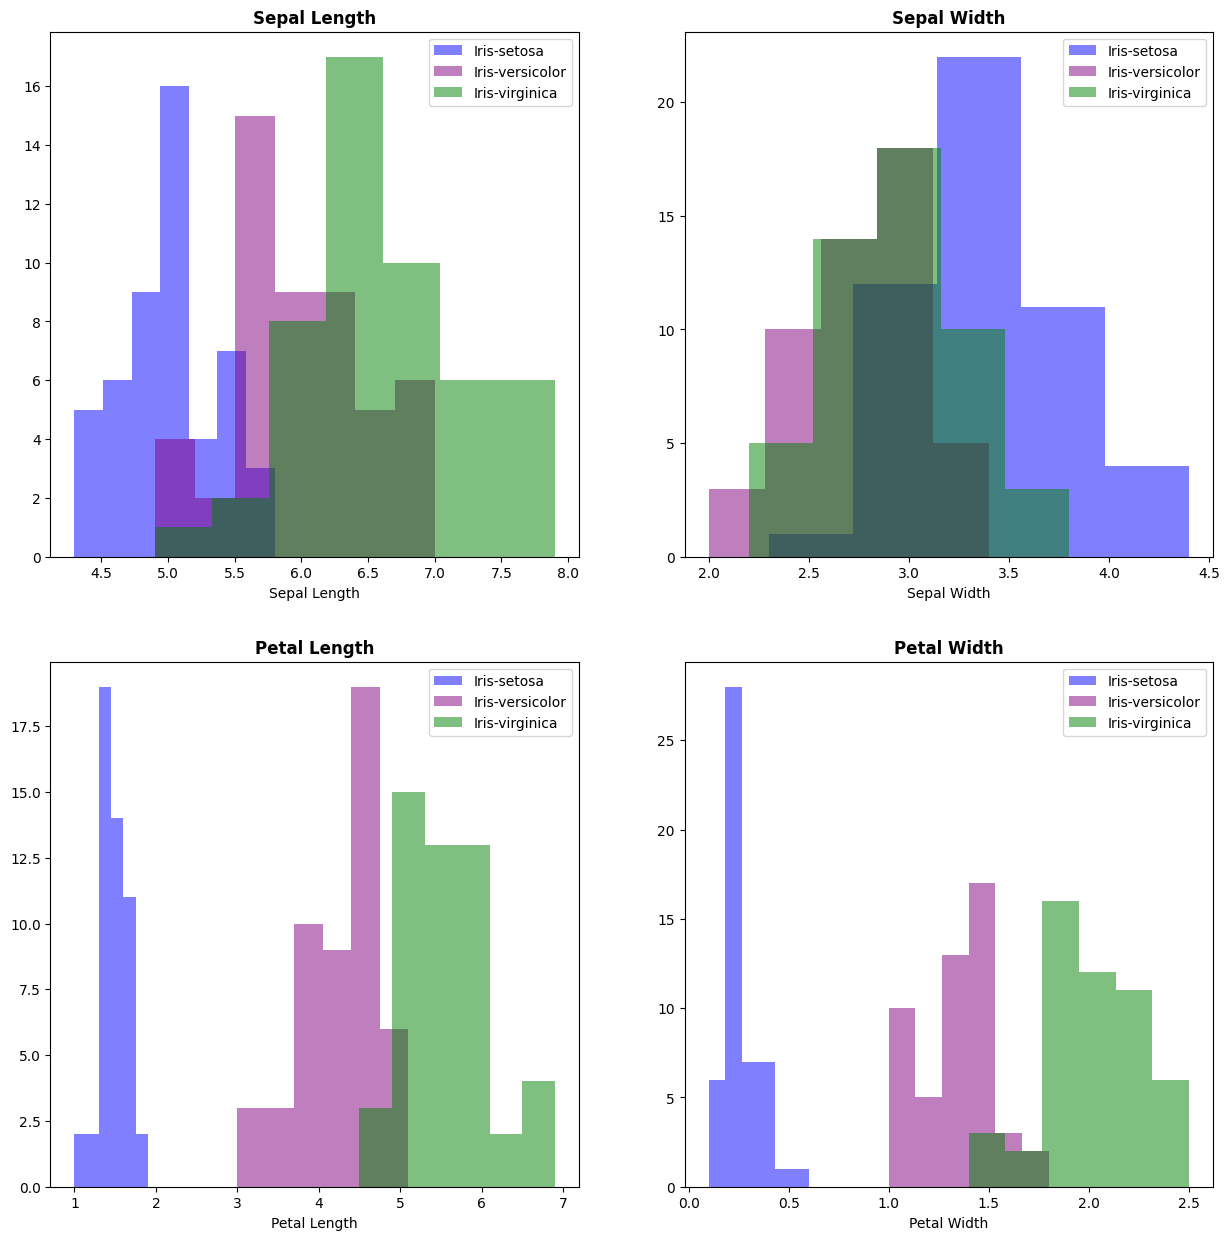

In [7]:
fig, axes = plt.subplots(2,2, figsize = (15,15))            # subplots created so the histograms will display together in a 2x2 layout
setosa = iris[iris.Class == "Iris-setosa"]                  # new variable created for each class of Iris plant
versicolor = iris[iris.Class == "Iris-versicolor"]
virginica = iris[iris.Class == "Iris-virginica"]

# sepal length histogram 
axes[0,0].set_title("Sepal Length", fontweight='bold')      # to plot the data for the plot in the top left of the 2x2 grid of subplots
axes[0,0].set(xlabel='Sepal Length')
axes[0,0].hist(setosa['Sepal_Length'], bins=7, alpha=0.5, label="Iris-setosa", color='blue')            # creates a histogram for setosa species
axes[0,0].hist(versicolor['Sepal_Length'], bins=7, alpha=0.5, label="Iris-versicolor", color='purple')  # creates a histogram for versicolor species
axes[0,0].hist(virginica['Sepal_Length'], bins=7, alpha=0.5, label="Iris-virginica", color='green')    # creates a histogram for virginica species
axes[0,0].legend(loc='upper right')                         # to set the location of the legend to be in the upper right corner
    
# sepal width histogram 
axes[0,1].set_title("Sepal Width", fontweight='bold')       # to plot the data for the plot in the top right of the 2x2 grid of subplots
axes[0,1].set(xlabel='Sepal Width')
axes[0,1].hist(setosa['Sepal_Width'], bins=5, alpha=0.5, label="Iris-setosa", color='blue')
axes[0,1].hist(versicolor['Sepal_Width'], bins=5, alpha=0.5, label="Iris-versicolor", color='purple')
axes[0,1].hist(virginica['Sepal_Width'], bins=5, alpha=0.5, label="Iris-virginica", color='green')
axes[0,1].legend(loc='upper right');

# petal length histogram 
axes[1,0].set_title("Petal Length", fontweight='bold')      # to plot the data for the plot in the bottom left of the 2x2 grid of subplots
axes[1,0].set(xlabel='Petal Length')
axes[1,0].hist(setosa['Petal_Length'], bins=6, alpha=0.5, label="Iris-setosa", color='blue')
axes[1,0].hist(versicolor['Petal_Length'], bins=6, alpha=0.5, label="Iris-versicolor", color='purple')
axes[1,0].hist(virginica['Petal_Length'], bins=6, alpha=0.5, label="Iris-virginica", color='green')
axes[1,0].legend(loc='upper right');

# petal width histogram 
axes[1,1].set_title("Petal Width", fontweight='bold')       # to plot the data for the plot in the bottom right of the 2x2 grid of subplots
axes[1,1].set(xlabel='Petal Width')
axes[1,1].hist(setosa['Petal_Width'], bins=6, alpha=0.5, label="Iris-setosa", color='blue')
axes[1,1].hist(versicolor['Petal_Width'], bins=6, alpha=0.5, label="Iris-versicolor", color='purple')
axes[1,1].hist(virginica['Petal_Width'], bins=6, alpha=0.5, label="Iris-virginica", color='green')
axes[1,1].legend(loc='upper right');

Sepal Width appears to be quite normally distributed.

As we know the mean and standard deviation for sepal width, we can use Numpy Random Generator to genertate 100,000 similar values using normally generated data. This will allow more analysis to be performed on sepal widths of Iris plants all over the world, and not just on the small amount of data recorded in the Iris dataset.

We can do this using all three Iris plant species, as well as further classifying the data by species and generating normally distributed data for sepal width for each fo the three species of Iris plant.


Firstly, if we take the Iris plant data as a whole, we can see from Table 1 above that the mean Sepal Width is 3.054 and the Standard deviation is 0.433594.

To randomly generate data, we will use the Numpy Random Generator rng.

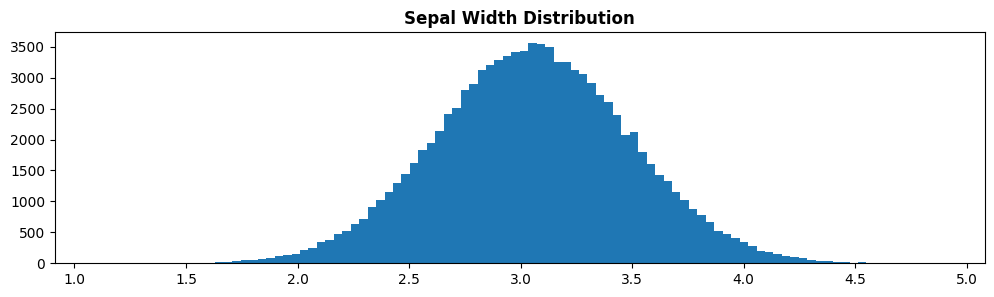

In [20]:
# random generator for Sepal Width
sepal_width_dist = np.random.normal(loc=3.054, scale=0.433594, size=100000)
fig, ax = plt.subplots(figsize=(12,3))

# Plot a histogram
ax.set_title("Sepal Width Distribution", fontweight='bold')
ax.hist(sepal_width_dist, bins=100, density=False);

Similarly, further breaking the data down by species, ramdomly generated data for sepal wifth for each of the three species can be obtained.

For the species Setosa, we can see from Table 3 above that the mean Sepal Width is 3.418 and the Standard deviation is 0.381024.
For the species Versicolor, we can see from Table 3 above that the mean Sepal Width is 2.77 and the Standard deviation is 0.313798.
For the species Virginica, we can see from Table 3 above that the mean Sepal Width is 2.974 and the Standard deviation is 0.322497.

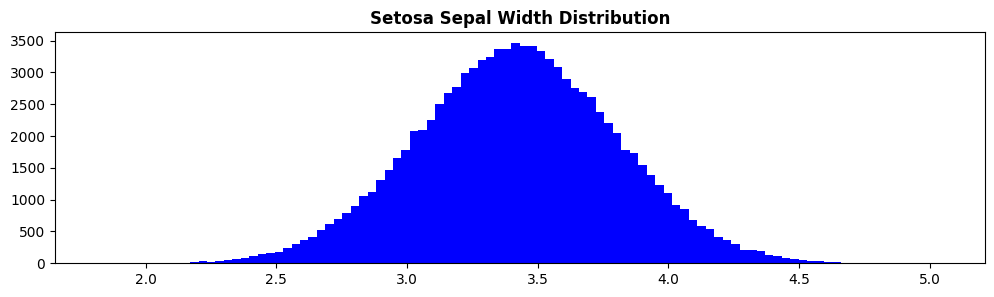

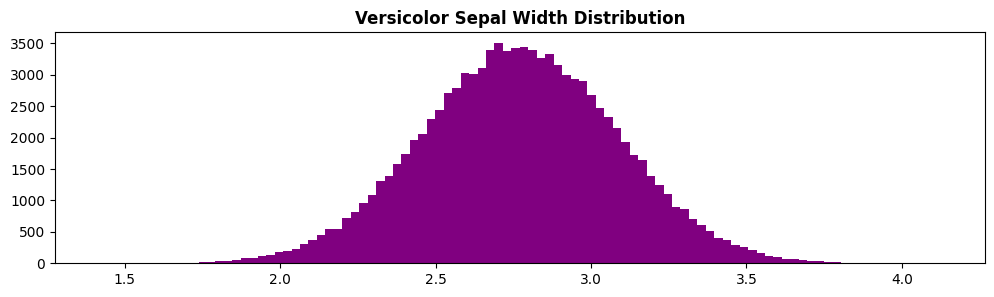

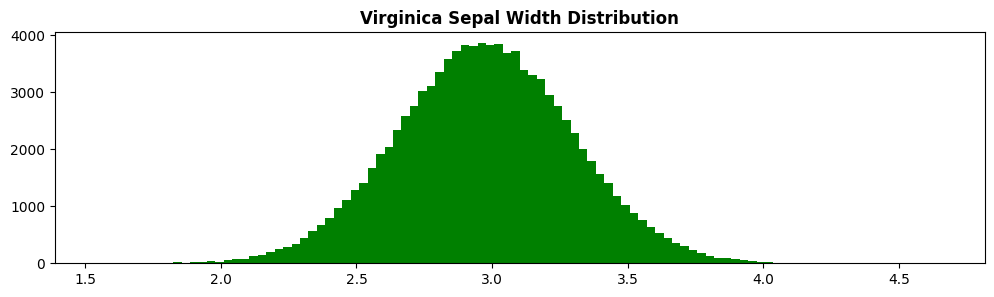

In [21]:
# random generator for Setosa Sepal Width
setosa_sepal_width_dist = np.random.normal(loc=3.418, scale=0.3810274, size=100000)
fig, ax = plt.subplots(figsize=(12,3))

# Plot a histogram
ax.set_title("Setosa Sepal Width Distribution", fontweight='bold')
ax.hist(setosa_sepal_width_dist, bins=100, density=False, color='blue');

# random generator for Versicolor Sepal Width
versicolor_sepal_width_dist = np.random.normal(loc=2.77, scale=0.313798, size=100000)
fig, ax = plt.subplots(figsize=(12,3))

# Plot a histogram
ax.set_title("Versicolor Sepal Width Distribution", fontweight='bold')
ax.hist(versicolor_sepal_width_dist, bins=100, density=False, color='purple');

# random generator for Virginica Sepal Width
virginica_sepal_width_dist = np.random.normal(loc=2.974, scale=0.322497, size=100000)
fig, ax = plt.subplots(figsize=(12,3))

# Plot a histogram
ax.set_title("Virginica Sepal Width Distribution", fontweight='bold')
ax.hist(virginica_sepal_width_dist, bins=100, density=False, color='green');

### Correlation between the Variables

***

End